## Salt Lithology Model

### Imports

In [12]:
import pandas as pd
import math
from typing import Iterable, List, Any
from collections import defaultdict

### Ranges

Define measurement ranges for each applicable salt.

Additionally, define distribution and weighings for individual salts.

#### GR

Assume unifrom distribution for each reading within range

In [31]:
GR_RANGES = {
    "Halite": {"min": 0, "max": 30},
    "Sylvite": {"min": 500, "max": 747},
    "Bischofite": {"min": 0, "max": 0},
    "Carnallite": {"min": 100, "max": 220},
    "Tachydrite": {"min": 0, "max": 10},
    "Kainite": {"min": 245, "max": 285.42},
    "Anhydrite": {"min": 0, "max": 70},
    "Gypsum": {"min": 0, "max": 0},
    "Kieserite": {"min": 0, "max": 0},
    "Langbeinite": {"min": 268, "max": 290},
    "Polyhalite": {"min": 180, "max": 200},
    "Barite": {"min": 0, "max": 0},
    "Calcite": {"min": 10, "max": 100},
    "Dolomite": {"min": 10, "max": 20},
    "Silt / Sandstone": {"min": 0, "max": 60},
    "Clay / Mudstone": {"min": 10, "max": 1000},
}

#### Others

In [32]:
DT_RANGES = {
    "Halite": {"min": 65, "max": 73},
    "Sylvite": {"min": 74, "max": 74},
    "Bischofite": {"min": 100, "max": 100},
    "Carnallite": {"min": 58, "max": 78},
    "Tachydrite": {"min": 92, "max": 92},
    "Kainite": {"min": None, "max": None},
    "Anhydrite": {"min": 49, "max": 67},
    "Gypsum": {"min": 52.5, "max": 52.5},
    "Kieserite": {"min": None, "max": None},
    "Langbeinite": {"min": 52, "max": 52},
    "Polyhalite": {"min": 57.5, "max": 57.5},
    "Barite": {"min": None, "max": None},
    "Calcite": {"min": 44, "max": 90},
    "Dolomite": {"min": 58, "max": 58},
    "Silt / Sandstone": {"min": 55, "max": 88},
    "Clay / Mudstone": {"min": 48, "max": 170},
}

RHOB_RANGES = {
    "Halite": {"min": 1.9, "max": 2.3},
    "Sylvite": {"min": None, "max": None},
    "Bischofite": {"min": None, "max": None},
    "Carnallite": {"min": 1.57, "max": 2.2},
    "Tachydrite": {"min": 1.66, "max": 1.72},
    "Kainite": {"min": None, "max": None},
    "Anhydrite": {"min": 2.03, "max": 2.98},
    "Gypsum": {"min": None, "max": None},
    "Kieserite": {"min": None, "max": None},
    "Langbeinite": {"min": None, "max": None},
    "Polyhalite": {"min": None, "max": None},
    "Barite": {"min": None, "max": None},
    "Calcite": {"min": 2.3, "max": 2.9},
    "Dolomite": {"min": 2.683, "max": 2.88},
    "Silt / Sandstone": {"min": 2.04, "max": 2.9},
    "Clay / Mudstone": {"min": 1.6, "max": 2.95},
}

NPHI_RANGES = {
    "Halite": {"min": -3, "max": 0},
    "Sylvite": {"min": -3, "max": 0},
    "Bischofite": {"min": 60, "max": 100},
    "Carnallite": {"min": 60, "max": 65},
    "Tachydrite": {"min": 50, "max": 100},
    "Kainite": {"min": 45, "max": 60},
    "Anhydrite": {"min": -2, "max": 0},
    "Gypsum": {"min": 49, "max": 60},
    "Kieserite": {"min": None, "max": None},
    "Langbeinite": {"min": None, "max": None},
    "Polyhalite": {"min": None, "max": None},
    "Barite": {"min": None, "max": None},
    "Calcite": {"min": None, "max": None},
    "Dolomite": {"min": 1, "max": 4},
    "Silt / Sandstone": {"min": None, "max": None},
    "Clay / Mudstone": {"min": 25, "max": 60},
}

PEF_RANGES = {
    "Halite": {"min": 4.65, "max": 4.72},
    "Sylvite": {"min": 8.51, "max": 8.76},
    "Bischofite": {"min": None, "max": None},
    "Carnallite": {"min": 4.09, "max": 4.29},
    "Tachydrite": {"min": 3.82, "max": 3.84},
    "Kainite": {"min": None, "max": None},
    "Anhydrite": {"min": 5.05, "max": 5.1},
    "Gypsum": {"min": 3.99, "max": 4},
    "Kieserite": {"min": 1.8, "max": 1.83},
    "Langbeinite": {"min": None, "max": None},
    "Polyhalite": {"min": None, "max": None},
    "Barite": {"min": None, "max": None},
    "Calcite": {"min": None, "max": None},
    "Dolomite": {"min": 3.09, "max": 3.14},
    "Silt / Sandstone": {"min": 1.7, "max": 2.7},
    "Clay / Mudstone": {"min": 3, "max": 5},
}


### Sample Data

In [4]:
data_file = r"C:\Users\HarrisEdlmann\Personal\Salt_Lithology_Mapping_Model.xlsx"

RUDSTON_2_DATA = pd.read_excel(
    data_file,
    sheet_name="Rudston 2 data",
    header=0,            # first row are column headers (default)
    dtype=float,         # try to cast all columns to float
    engine="openpyxl",   # explicit engine for .xlsx
    na_values=["", "NA"] # optional: treat these as NaN
)

# add more data here ...

### Model

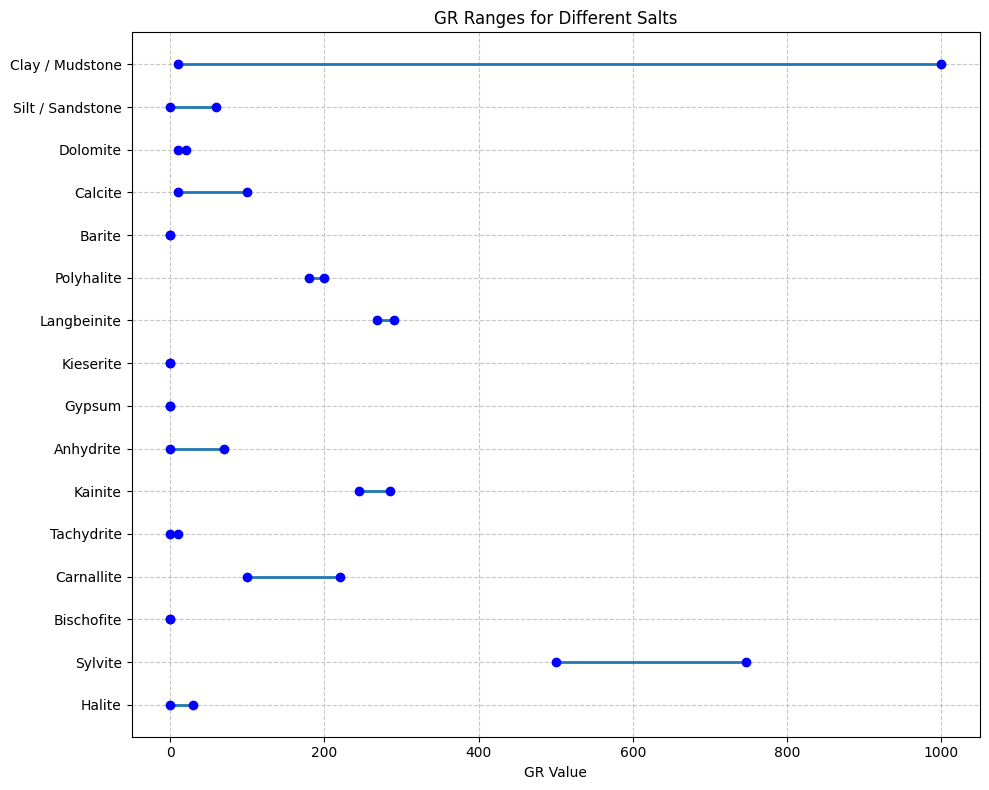

In [47]:
import matplotlib.pyplot as plt

# Prepare data
salts = []
mins = []
maxs = []

for salt, range_ in GR_RANGES.items():
    if range_["min"] is not None and range_["max"] is not None:
        salts.append(salt)
        mins.append(range_["min"])
        maxs.append(range_["max"])

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plot horizontal lines for each salt's range
y_positions = range(len(salts))
for i, (min_val, max_val) in enumerate(zip(mins, maxs)):
    ax.hlines(y=i, xmin=min_val, xmax=max_val, linewidth=2)
    # Add endpoints
    ax.plot(min_val, i, 'o', color='blue')
    ax.plot(max_val, i, 'o', color='blue')

# Customize plot
ax.set_yticks(y_positions)
ax.set_yticklabels(salts)
ax.set_xlabel('GR Value')
ax.set_title('GR Ranges for Different Salts')
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [28]:
def get_salts_from_measurement(measurement, measurement_type):
    ranges = None
    measurement_type = measurement_type.upper()
    if measurement_type == "GR":
        ranges = GR_RANGES
    elif measurement_type == "DT":
        ranges = DT_RANGES
    elif measurement_type == "RHOB":
        ranges = RHOB_RANGES
    elif measurement_type == "NPHI":
        ranges = NPHI_RANGES
    elif measurement_type == "PEF":
        ranges = PEF_RANGES
    else:
        raise ValueError(f"Unknown measurement type: {measurement_type}")

    possible_salts = []
    for salt, range_ in ranges.items():
        min_val = range_["min"]
        max_val = range_["max"]
        if min_val is not None and max_val is not None:
            if min_val <= measurement <= max_val:
                possible_salts.append(salt)
    
    return possible_salts

def common_salts(*lists):
    """
    Return sorted list of items present in every provided iterable.
    """
    def clean(it):
        return {x for x in it if x is not None and not (isinstance(x, float) and math.isnan(x))}
    if not lists:
        return []
    for lst in lists:
        print(lst)
    sets = [clean(lst) for lst in lists]
    if any(len(s) == 0 for s in sets):
        return []
    common = set.intersection(*sets)
    return sorted(common)

In [43]:
def get_salts_from_measurement(measurement, measurement_type):
    """Returns list of (salt, weight) tuples for matching ranges"""
    ranges = None
    measurement_type = measurement_type.upper()
    if measurement_type == "GR":
        ranges = GR_RANGES
    elif measurement_type == "DT":
        ranges = DT_RANGES
    elif measurement_type == "RHOB":
        ranges = RHOB_RANGES
    elif measurement_type == "NPHI":
        ranges = NPHI_RANGES
    elif measurement_type == "PEF":
        ranges = PEF_RANGES
    else:
        raise ValueError(f"Unknown measurement type: {measurement_type}")

    possible_salts = []
    for salt, range_ in ranges.items():
        min_val = range_.get("min")
        max_val = range_.get("max")
        if min_val is not None and max_val is not None:
            if min_val <= measurement <= max_val:
                # Calculate weight based on how close to center of range
                # TODO: allow for user-defined distributions within ranges for each salt
                center = (max_val + min_val) / 2
                range_width = max_val - min_val
                if range_width == 0:
                    # Exact match gets high weight
                    weight = 1.0 if measurement == min_val else 0.0
                else:
                    # Weight decreases as value moves away from center
                    
                    distance = abs(measurement - center)
                    weight = 1.0 - (2 * distance / range_width)
                possible_salts.append((salt, weight))
    
    return possible_salts

def calculate_best_salts(*measurement_lists):
    """
    Find common salts across measurements, considering weights and measurement counts.
    Each measurement_list contains (salt, weight) tuples.
    Returns list of (salt, total_weight, count) sorted by weighted score.
    """
    def clean(it):
        return {x[0]: x[1] for x in it if x[0] is not None 
               and not (isinstance(x[0], float) and math.isnan(x[0]))}
    
    if not measurement_lists:
        return []

    # Convert lists to dicts of salt:weight
    salt_weights = [clean(lst) for lst in measurement_lists]
    print(salt_weights)
    
    # Count occurrences and sum weights for each salt across all measurements
    salt_stats = defaultdict(lambda: {"sum_weights": 0.0, "count": 0})
    
    # Process each measurement list
    for weights in salt_weights:
        for salt, weight in weights.items():
            salt_stats[salt]["sum_weights"] += weight
            salt_stats[salt]["count"] += 1

    print(salt_stats)
    
    # Calculate final scores considering both total weight and measurement count
    max_possible_count = len(measurement_lists)
    results = []
    for salt, stats in salt_stats.items():
        # Scale factor based on how many measurements contain this salt
        count_factor = stats["count"] / max_possible_count  # 0.0 to 1.0
        # Combined score using sum of weights scaled by measurement coverage
        final_weight = stats["sum_weights"] * count_factor
        results.append((salt, final_weight, stats["count"]))

    print(results)
    
    # Sort by weight descending, then salt name
    return sorted(results, key=lambda x: (-x[1], x[0]))

In [5]:
print(RUDSTON_2_DATA.head())  # Display the first few rows of the dataframe

    DEPTH       GR    DT    RHOB  NPHI     PEF
0  7644.0  28.1250  48.4  2.8115  2.31  4.5352
1  7643.5  28.5000  48.3  2.8175  1.62  4.4023
2  7643.0  28.2813  48.3  2.8041  1.39  4.4141
3  7642.5  26.5625  48.2  2.8044  1.23  4.5273
4  7642.0  25.0625  49.0  2.7857  1.17  4.8164


In [24]:
# Get possible salts for each measurement type
measurements = ["GR", "DT", "RHOB", "NPHI", "PEF"]
results = []

# for _, row in RUDSTON_2_DATA.iterrows():
#     depth = row['DEPTH']
#     # Get salt lists for each measurement
#     salt_lists = []
#     for mtype in measurements:
#         if pd.notna(row[mtype]):  # only include non-NaN measurements
#             salts = get_salts_from_measurement(row[mtype], mtype)
#             salt_lists.append(salts)
    
#     # Find common salts across all measurements
#     common = common_salts(*salt_lists)
#     print(salt_lists)
#     results.append({
#         'Depth': depth,
#         'Common_Salts': common,
#         'Count': len(common)
#     })
#     print(f"Depth: {depth}, Common Salts: {common}, Count: {len(common)}")

# Update the processing loop:
for _, row in RUDSTON_2_DATA.iterrows():
    depth = row['DEPTH']
    salt_lists = []
    for mtype in measurements:
        if pd.notna(row[mtype]):
            salts = get_salts_from_measurement(row[mtype], mtype)
            salt_lists.append(salts)
    
    weighted_common = common_salts(*salt_lists)
    results.append({
        'Depth': depth,
        'Common_Salts': [salt for salt, _ in weighted_common],
        'Salt_Weights': [weight for _, weight in weighted_common],
        'Count': len(weighted_common)
    })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df.head())

# Optionally, add results back to original dataframe
RUDSTON_2_DATA['Common_Salts'] = results_df['Common_Salts']
RUDSTON_2_DATA['Salt_Count'] = results_df['Count']

Depth: 7644.0, Measurement Type: GR, Value: 28.125, Possible Salts: ['Halite', 'Anhydrite', 'Calcite', 'Silt / Sandstone', 'Clay / Mudstone']
Depth: 7644.0, Measurement Type: DT, Value: 48.4, Possible Salts: ['Calcite', 'Clay / Mudstone']
Depth: 7644.0, Measurement Type: RHOB, Value: 2.8115, Possible Salts: ['Anhydrite', 'Calcite', 'Dolomite', 'Silt / Sandstone', 'Clay / Mudstone']
Depth: 7644.0, Measurement Type: NPHI, Value: 2.31, Possible Salts: ['Dolomite']
Depth: 7644.0, Measurement Type: PEF, Value: 4.5352, Possible Salts: ['Clay / Mudstone']
[['Halite', 'Anhydrite', 'Calcite', 'Silt / Sandstone', 'Clay / Mudstone'], ['Calcite', 'Clay / Mudstone'], ['Anhydrite', 'Calcite', 'Dolomite', 'Silt / Sandstone', 'Clay / Mudstone'], ['Dolomite'], ['Clay / Mudstone']]
Depth: 7644.0, Common Salts: [], Count: 0
Depth: 7643.5, Measurement Type: GR, Value: 28.5, Possible Salts: ['Halite', 'Anhydrite', 'Calcite', 'Silt / Sandstone', 'Clay / Mudstone']
Depth: 7643.5, Measurement Type: DT, Value:

In [44]:
row = RUDSTON_2_DATA.iloc[0]
depth = row['DEPTH']
salt_lists = []
for mtype in measurements:
    if pd.notna(row[mtype]):
        
        salts = get_salts_from_measurement(row[mtype], mtype)
        print(f"{mtype}: {row[mtype]}, {salts}")
        print([salt[0] for salt in salts])
        salt_lists.append(salts)

common = calculate_best_salts(*salt_lists)
print(f"Depth: {depth}, Common Salts: {common}")



GR: 28.125, [('Halite', np.float64(0.125)), ('Anhydrite', np.float64(0.8035714285714286)), ('Calcite', np.float64(0.4027777777777778)), ('Silt / Sandstone', np.float64(0.9375)), ('Clay / Mudstone', np.float64(0.03661616161616166))]
['Halite', 'Anhydrite', 'Calcite', 'Silt / Sandstone', 'Clay / Mudstone']
DT: 48.4, [('Calcite', np.float64(0.19130434782608685)), ('Clay / Mudstone', np.float64(0.006557377049180357))]
['Calcite', 'Clay / Mudstone']
RHOB: 2.8115, [('Anhydrite', np.float64(0.3547368421052628)), ('Calcite', np.float64(0.2949999999999986)), ('Dolomite', np.float64(0.6954314720812158)), ('Silt / Sandstone', np.float64(0.20581395348837117)), ('Clay / Mudstone', np.float64(0.20518518518518558))]
['Anhydrite', 'Calcite', 'Dolomite', 'Silt / Sandstone', 'Clay / Mudstone']
NPHI: 2.31, [('Dolomite', np.float64(0.8733333333333334))]
['Dolomite']
PEF: 4.5352, [('Clay / Mudstone', np.float64(0.4648000000000003))]
['Clay / Mudstone']
[{'Halite': np.float64(0.125), 'Anhydrite': np.float64